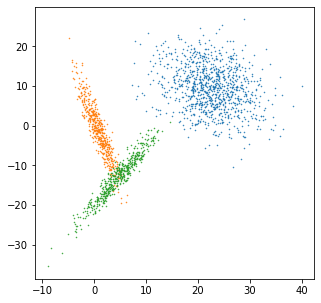

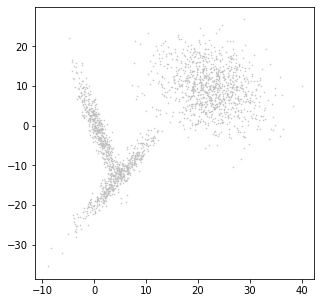

In [14]:
import numpy as np 
import numpy.matlib 
import matplotlib.pyplot as plt

# np.random.rand = uniform random generation, [0, 1]
# np.random.randn = normal random generation, N(0, 1)
r1 = 10*(np.random.rand(2,2) - 0.5)
r2 = 10*(np.random.rand(2,2) - 0.5)
r3 = 10*(np.random.rand(2,2) - 0.5)

t1 = 50*(np.random.rand(1,2) - 0.5)
t2 = 50*(np.random.rand(1,2) - 0.5)
t3 = 50*(np.random.rand(1,2) - 0.5)

X1 = np.random.randn(1000,2)
X1 = X1.dot(r1) + t1

X2 = np.random.randn(500,2)
X2 = X2.dot(r2) + t2

X3 = np.random.randn(500,2)
X3 = X3.dot(r3) + t3

plt.figure(figsize = (5,5))
plt.plot(X1[:,0],X1[:,1],"C0.",markersize = 1)
plt.plot(X2[:,0],X2[:,1],"C1.",markersize = 1)
plt.plot(X3[:,0],X3[:,1],"C2.",markersize = 1)

# unlabel data
X = np.vstack([X1, X2, X3])
np.random.shuffle(X)

plt.figure(figsize = (5,5))
plt.plot(X[:,0],X[:,1],".",markersize = 1, color = [0.75, 0.75, 0.75])

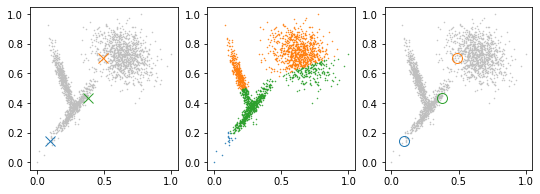

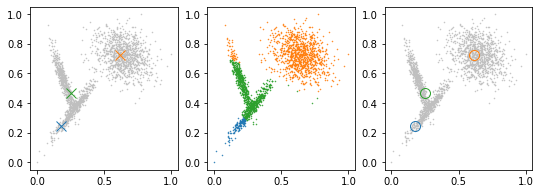

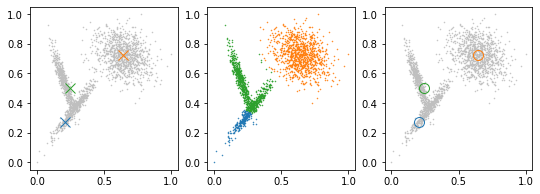

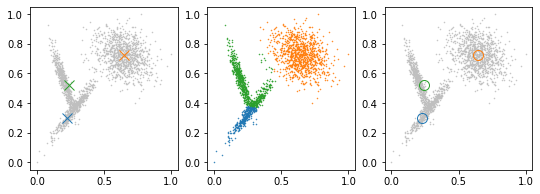

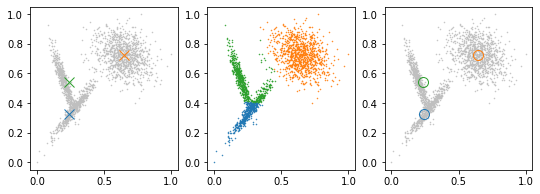

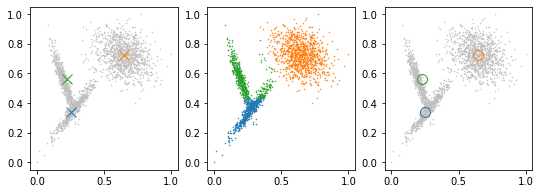

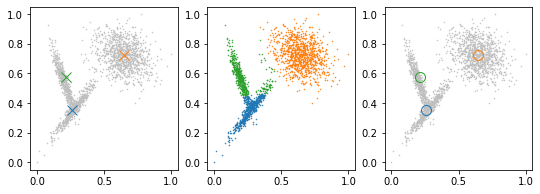

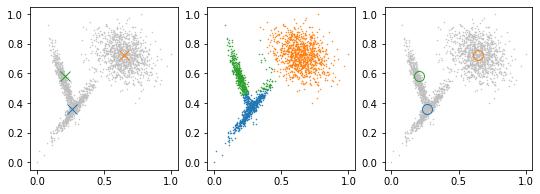

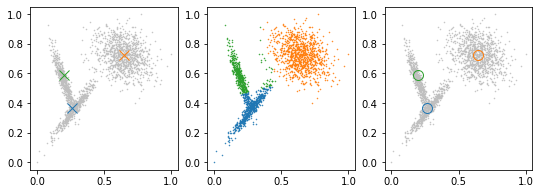

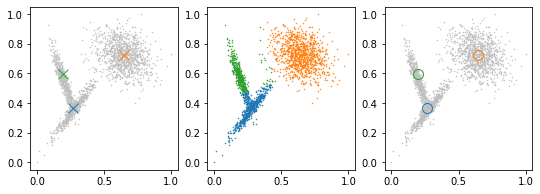

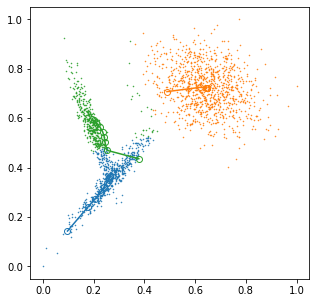

In [20]:
# parameter
K = 3
maxIter = 10

# normalization
Xmin = np.min(X, axis = 0)
Xmax = np.max(X, axis = 0)
X = (X - Xmin) / Xmax

# initialize
(N, D) = X.shape
mu_traj= np.zeros((K,D,maxIter))

# mu를 랜덤으로 초기화, 각 열 = 각 cluster의 중심
mu = np.random.rand(K,D)

# n번째 sample부터, k번째 cluster의 중심까지의 거리**2
dist2 = np.zeros((N,K)) 

for iter in range(0,maxIter):
    for k in range(0,K):
        dist2[:,k] = np.sum((X - np.matlib.repmat(mu[k,:],N,1))**2, axis = 1)

    # 어느 cluster까지 제일 가까운지를 저장
    c = np.argmin(dist2, axis = 1)
    r = np.zeros((N,K), dtype = bool)
    r[np.arange(N),c] = 1

    # 각 cluster에 대해 mu를 업데이트
    for k in range(0,K):
#         mu[k,:] = np.mean(X[c == k,:], axis = 0)
        mu[k,:] = np.mean(X[r[:,k],:], axis = 0)
    
    # iteration별로 mean 저장
    mu_traj[:,:,iter] = mu
        
    plt.figure(figsize = (9,3))
    plt.subplot(1,3,1)
    plt.plot(X[:,0],X[:,1],".",markersize = 1, color = [0.75, 0.75, 0.75])
    for k in range(0,K):
        plt.plot(mu[k,0],mu[k,1],"x",markersize = 10)

    plt.subplot(1,3,2)
    for k in range(0,K):
        plt.plot(X[c == k,0],X[c == k,1],".",markersize = 1)

    plt.subplot(1,3,3)
    plt.plot(X[:,0],X[:,1],".",markersize = 1, color = [0.75, 0.75, 0.75])
    for k in range(0,K):
        plt.plot(mu[k,0],mu[k,1],"o",markersize = 10,fillstyle = 'none')
        

plt.figure(figsize = (5,5))
# plt.plot(X[:,0],X[:,1],".",markersize = 1, color = [0.75, 0.75, 0.75])
for k in range(0,K):
    plt.plot(X[c == k,0],X[c == k,1],".",markersize = 1)
plt.gca().set_prop_cycle(None)
for k in range(0,K):
    plt.plot(mu_traj[k,0,:],mu_traj[k,1,:],'o-',fillstyle = 'none')

In [21]:
print(c)
print(r)

[1 1 1 ... 0 1 1]
[[False  True False]
 [False  True False]
 [False  True False]
 ...
 [ True False False]
 [False  True False]
 [False  True False]]


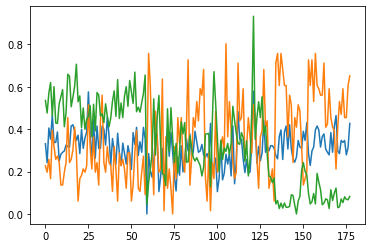

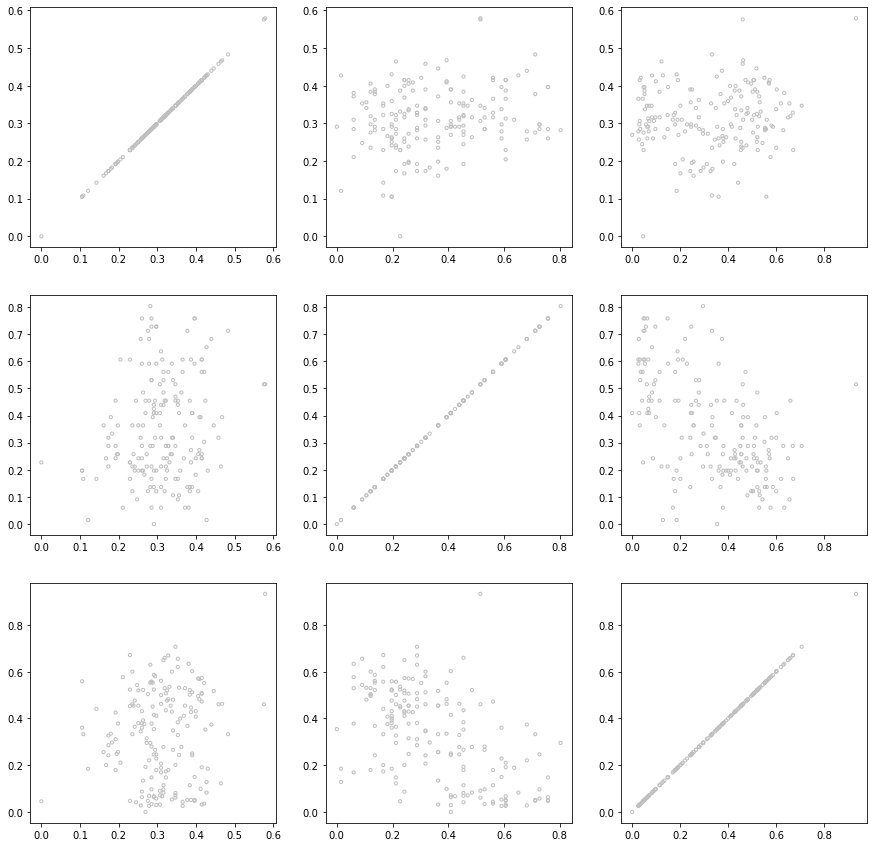

In [3]:
from numpy import genfromtxt
X = genfromtxt('wine-clustering.csv', delimiter=',', skip_header = 1)

Xmin = np.min(X, axis = 0)
Xmax = np.max(X, axis = 0)
X = (X - Xmin) / Xmax

X = X[:,[2, 7, 6]]
(N,D) = X.shape

plt.figure()
plt.plot(X)

plt.figure(figsize = (15, 15))
for i in range(0, D):
    for j in range(0, D):
        plt.subplot(D, D, (i + 1) + D*j)
        plt.scatter(X[:,i],X[:,j], s = 10, color = [0.75, 0.75, 0.75], facecolor = 'none')

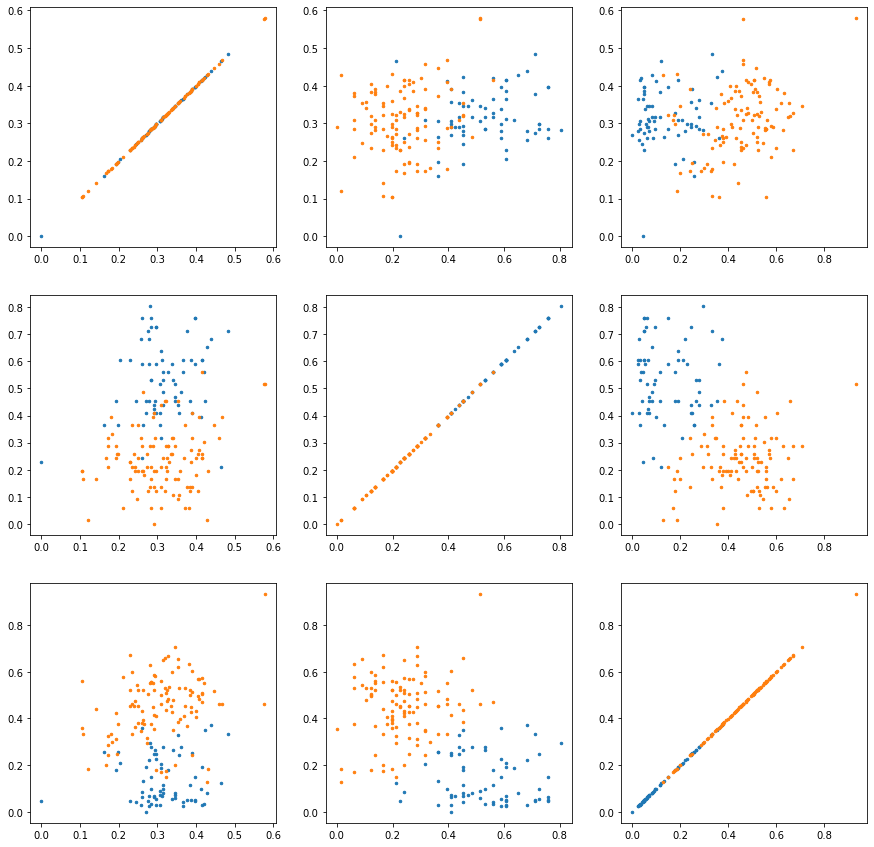

In [4]:
def c = train_kmeans(X, K):
    (N,D) = X.shape

    # mu를 랜덤으로 초기화, 각 열 = 각 cluster의 중심
    mu = np.random.rand(K,D)

    # n번째 sample부터, k번째 cluster의 중심까지의 거리**2
    dist2 = np.zeros((N,K)) 

    for iter in range(0,10):
        for k in range(0,K):
            dist2[:,k] = np.sum((X - np.matlib.repmat(mu[k,:],N,1))**2, axis = 1)

        # 어느 cluster까지 제일 가까운지를 c에 저장
        c = np.argmin(dist2, axis = 1) # dist = (N x K), 
        
        # 각 cluster에 대해 mu를 업데이트
        for k in range(0,K):
            mu[k,:] = np.mean(X[c == k,:], axis = 0)

c = train_kmeans(X, 2)

plt.figure(figsize = (15, 15))
for i in range(0, D):
    for j in range(0, D):
        plt.subplot(D, D, (i + 1) + D*j)
        for k in range(0,K):
            plt.plot(X[c == k,i],X[c == k,j],".",markersize = 5)


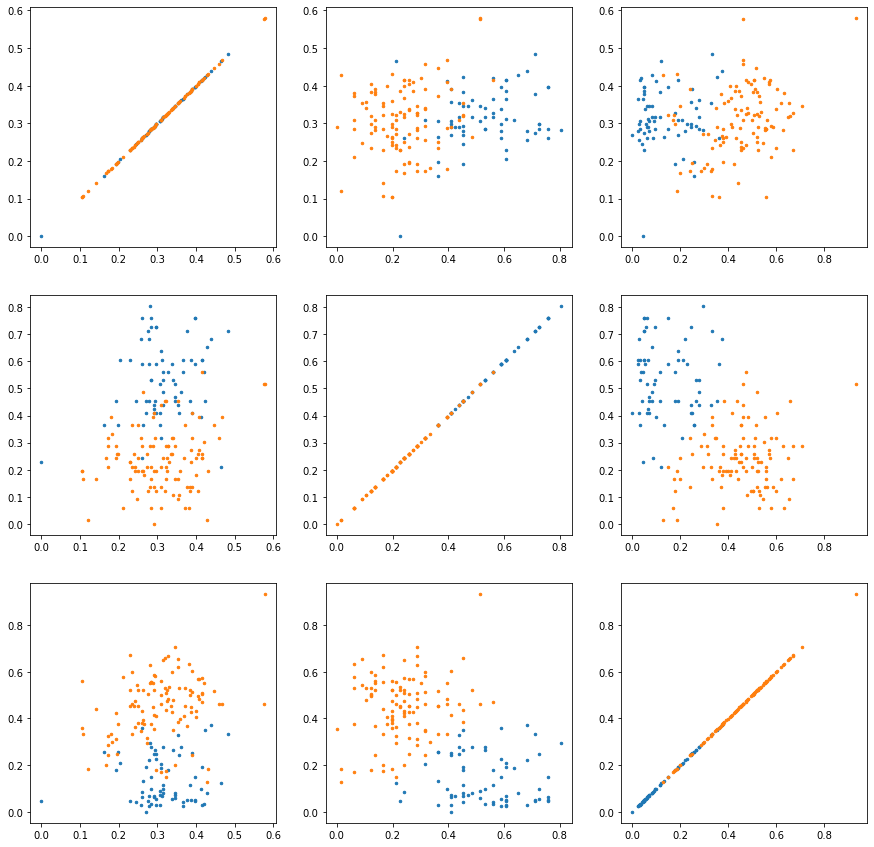

In [5]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2)
model.fit(X)

plt.figure(figsize = (15, 15))
for i in range(0, D):
    for j in range(0, D):
        plt.subplot(D, D, (i + 1) + D*j)
        for k in range(0, K):
            plt.plot(X[model.labels_ == k,i],X[model.labels_ == k,j],".",markersize = 5)